In [1]:
import matplotlib.pyplot as plt
from math import ceil
import os
x_length = 101
cwndDict04 = {"reno": [0] * x_length, "cubic": [0] * x_length, "yeah": [0] * x_length, "vegas": [0] * x_length}
cwndDict15 = {"reno": [0] * x_length, "cubic": [0] * x_length, "yeah": [0] * x_length, "vegas": [0] * x_length}
goodputDict04 = {"reno": [0] * x_length, "cubic": [0] * x_length, "yeah": [0] * x_length, "vegas": [0] * x_length}
goodputDict15 = {"reno": [0] * x_length, "cubic": [0] * x_length, "yeah": [0] * x_length, "vegas": [0] * x_length}
rttDict04 = {"reno": [0] * x_length, "cubic": [0] * x_length, "yeah": [0] * x_length, "vegas": [0] * x_length}
rttDict15 = {"reno": [0] * x_length, "cubic": [0] * x_length, "yeah": [0] * x_length, "vegas": [0] * x_length}
lossDict04 = {"reno": [0] * x_length, "cubic": [0] * x_length, "yeah": [0] * x_length, "vegas": [0] * x_length}
lossDict15 = {"reno": [0] * x_length, "cubic": [0] * x_length, "yeah": [0] * x_length, "vegas": [0] * x_length}


In [2]:


def splitFile(filename):
	lines = []
	file = open(filename, 'r')
	line = file.readline()
	while line:
		lines.append(line.split())
		line = file.readline()
	return lines

def adjustArray(arr, defaultVal):
	for i in range(len(arr)):
		if arr[i] == defaultVal:
			arr[i] = arr[i-1] if i != 0 else 0
	return arr

def splitCWND(data):
	cwnds04 = [-1] * x_length
	cwnds15 = [-1] * x_length
	for line in data:
		if 'cwnd_' in line:
			indexes = [0,6]
			if line[1] == '0':
				cwnds04[ceil(float(line[0]))] = float(line[6])
			else:
				cwnds15[ceil(float(line[0]))] = float(line[6])
	cwnds04 = adjustArray(cwnds04, -1)
	cwnds15 = adjustArray(cwnds15, -1)

	return cwnds04, cwnds15

def splitAcks(data):
	acks04 = ['none'] * x_length
	acks15 = ['none'] * x_length
	for line in data:
		if 'ack_' in line:
			if line[1] == '0':
				acks04[ceil(float(line[0]))] = int(line[-1])
			else:
				acks15[ceil(float(line[0]))] = int(line[-1])
	return adjustArray(acks04, 'none'), adjustArray(acks15, 'none')

def splitloss(data):
	loss04 = [-1] * x_length
	lastloss04 = 0
	loss15 = [-1] * x_length
	lastloss15 = 0
	for line in data:
		if line[0] == 'd':
			if line[-4][0] == '0':
				lastloss04 += 1
				loss04[ceil(float(line[1]))] = lastloss04
			elif line[-4][0] == '1':
				lastloss15 += 1
				loss15[ceil(float(line[1]))] = lastloss15
	return adjustArray(loss04, -1), adjustArray(loss15, -1)

def splitRtt(data):
	rtt04 = [-1] * x_length
	rtt15 = [-1] * x_length
	for line in data:
		if 'rtt_' in line:
			if line[1] == '0':
				rtt04[ceil(float(line[0]))] = float(line[-1])
			else:
				rtt15[ceil(float(line[0]))] = float(line[-1])
	return adjustArray(rtt04, -1), adjustArray(rtt15, -1)

def addCwndDatas(renoData, cubicData, yeahData,vegasData):
	global cwndDict04, cwndDict15
	renoCwnds04, renoCwnds15 = splitCWND(renoData)
	cubicCwnds04, cubicCwnds15 = splitCWND(cubicData)
	yeahCwnds04, yeahCwnds15 = splitCWND(yeahData)
	vegasCwnds04, vegasCwnds15 = splitCWND(vegasData)

	for i in range(x_length):
		cwndDict04['reno'][i] += renoCwnds04[i]
		cwndDict04['cubic'][i] += cubicCwnds04[i]
		cwndDict04['yeah'][i] += yeahCwnds04[i]
		cwndDict04['vegas'][i] += vegasCwnds04[i]
		cwndDict15['reno'][i] += renoCwnds15[i]
		cwndDict15['cubic'][i] += cubicCwnds15[i]
		cwndDict15['yeah'][i] += yeahCwnds15[i]
		cwndDict15['vegas'][i] += vegasCwnds15[i]

def addGoodputDatas(renoData, cubicData, yeahData,vegasData):
	global goodputDict04, goodputDict15
	renoGoodputs04, renoGoodputs15 = splitAcks(renoData)
	cubicGoodputs04, cubicGoodputs15 = splitAcks(cubicData)
	yeahGoodputs04, yeahGoodputs15 = splitAcks(yeahData)
	vegasGoodputs04, vegasGoodputs15 = splitAcks(vegasData)

	for i in range(x_length):
		goodputDict04['reno'][i] += renoGoodputs04[i]
		goodputDict04['cubic'][i] += cubicGoodputs04[i]
		goodputDict04['yeah'][i] += yeahGoodputs04[i]
		goodputDict04['vegas'][i] += vegasGoodputs04[i]
		goodputDict15['reno'][i] += renoGoodputs15[i]
		goodputDict15['cubic'][i] += cubicGoodputs15[i]
		goodputDict15['yeah'][i] += yeahGoodputs15[i]
		goodputDict15['vegas'][i] += vegasGoodputs15[i]

def addRttDatas(renoData, cubicData, yeahData,vegasData):
	global rttDict04, rttDict15
	renoRtts04, renoRtts15 = splitRtt(renoData)
	cubicRtts04, cubicRtts15 = splitRtt(cubicData)
	yeahRtts04, yeahRtts15 = splitRtt(yeahData)
	vegasRtts04, vegasRtts15 = splitRtt(vegasData)

	for i in range(x_length):
		rttDict04['reno'][i] += renoRtts04[i]
		rttDict04['cubic'][i] += cubicRtts04[i]
		rttDict04['yeah'][i] += yeahRtts04[i]
		rttDict04['vegas'][i] += vegasRtts04[i]
		rttDict15['reno'][i] += renoRtts15[i]
		rttDict15['cubic'][i] += cubicRtts15[i]
		rttDict15['yeah'][i] += yeahRtts15[i]
		rttDict15['vegas'][i] += vegasRtts15[i]

def addlossDatas(renoData, cubicData, yeahData,vegasData):
	global lossDict04, lossDict15
	renoloss04, renoloss15 = splitloss(renoData)
	cubicloss04, cubicloss15 = splitloss(cubicData)
	yeahloss04, yeahloss15 = splitloss(yeahData)
	vegasloss04, vegasloss15 = splitloss(vegasData)

	for i in range(x_length):
		lossDict04['reno'][i] += renoloss04[i]
		lossDict04['cubic'][i] += cubicloss04[i]
		lossDict04['yeah'][i] += yeahloss04[i]
		lossDict04['vegas'][i] += vegasloss04[i]
		lossDict15['reno'][i] += renoloss15[i]
		lossDict15['cubic'][i] += cubicloss15[i]
		lossDict15['yeah'][i] += yeahloss15[i]
		lossDict15['vegas'][i] += vegasloss15[i]


In [5]:

def runOneEpoch():
	# os.system("ns renoCode.tcl")
	# os.system("ns cubicCode.tcl")
	# os.system("ns yeahCode.tcl")
	# os.system("ns vegasCode.tcl")

	renoData = splitFile('renoTrace.tr')
	cubicData = splitFile('cubicTrace.tr')
	yeahData = splitFile('yeahTrace.tr')
	vegasData = splitFile('vegasTrace.tr')

	addCwndDatas(renoData, cubicData, yeahData, vegasData)
	addGoodputDatas(renoData, cubicData, yeahData, vegasData)
	addRttDatas(renoData, cubicData, yeahData, vegasData)
	addlossDatas(renoData, cubicData, yeahData, vegasData)

def calcAvgVars():
	global cwndDict04, cwndDict15, goodputDict04, goodputDict15
	for key in cwndDict04.keys():
		for i in range(x_length):
			cwndDict04[key][i] /= 10
			cwndDict15[key][i] /= 10
			goodputDict04[key][i] /= 10
			goodputDict15[key][i] /= 10
			rttDict04[key][i] /= 10
			rttDict15[key][i] /= 10
			lossDict04[key][i] /= 10
			lossDict15[key][i] /= 10

def run():
	runOneEpoch()


def derivative(arr):
	arr2 = [0] * len(arr)
	for i in range(1,len(arr)):
		arr2[i] = arr[i] / i
	arr2[0] = arr[0]
	return arr2

def difference(arr):
	arr2 = [0] * len(arr)
	for i in range(1, len(arr)):
		arr2[i] = arr[i] - arr[i-1]
	arr2[0] = arr[0]
	return arr2

def analyzeGoodPut():
	global goodputDict04, goodputDict15

	colors = ['k', 'k', 'y', 'g', 'b', 'r', 'c', 'm']
	for key in goodputDict04.keys():
		plt.plot(range(x_length),derivative(goodputDict04[key]), label=key+'04', c = colors[-1])
		colors.pop()
		# plt.plot(range(x_length), derivative(goodputDict15[key]), label=key+'15', c = colors[-1])
		# colors.pop()

	# plt.xlabel("time")
	# plt.ylabel("Goodput rate")
	# plt.title("Goodput rate per second")
	# plt.legend()
	# plt.show()



def analyzeloss():
	global lossDict04, lossDict15
	colors = ['k', 'k', 'y', 'g', 'b', 'r', 'c', 'm']
	for key in lossDict04.keys():
		plt.plot(range(x_length),difference(lossDict04[key]), label=key+'04', c = colors[-1])
		colors.pop()
		# plt.plot(range(x_length), difference(lossDict15[key]), label=key+'15', c = colors[-1])
		# colors.pop()

	# plt.xlabel("time")
	# plt.ylabel("Packet loss rate")
	# plt.title("Packet loss rate per second")
	# plt.legend()
	# plt.show()


In [6]:
def draw_doubleY(x, xName, y1, y1Name, y2, y2Name, ax1, x2=None):
	# fig = plt.figure()
	# ax1 = fig.add_subplot(111)
	ax1.plot(x, y1,'r',label=y1Name);
	ax1.legend(loc=2)
	ax1.set_ylabel(y1Name);
	ax2 = ax1.twinx() # this is the important function
	if x2 == None:
		ax2.plot(x, y2, 'g',label = y2Name)
	else:
		ax2.plot(x2, y2, 'g',label = y2Name)

	ax2.legend(loc=1)
	ax2.set_xlim([min(x), max(x)]);
	ax2.set_ylabel(y2Name);
	ax1.set_xlabel(xName);
	ax2.set_xlabel(xName);


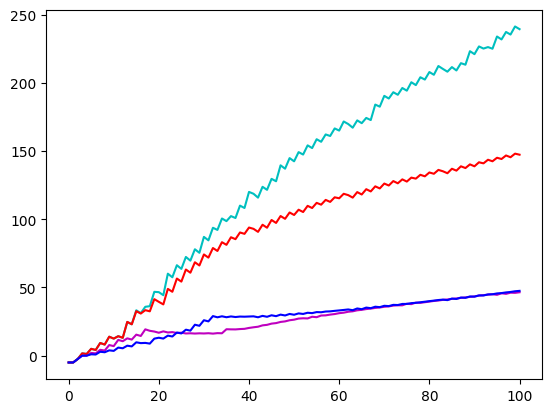

In [42]:
run()
analyzeGoodPut()

In [43]:
import  traceanalyzer as tr
import matplotlib.pyplot as plt
%matplotlib inline
#end-to-end delay
RenoEEdelay1=tr.Eedelay('renoTrace.tr','3')
VegasEEdelay2=tr.Eedelay('vegasTrace.tr','3')
CubicEEdelay3=tr.Eedelay('cubicTrace.tr','3')
YeahEEdelay4=tr.Eedelay('yeahTrace.tr','3')

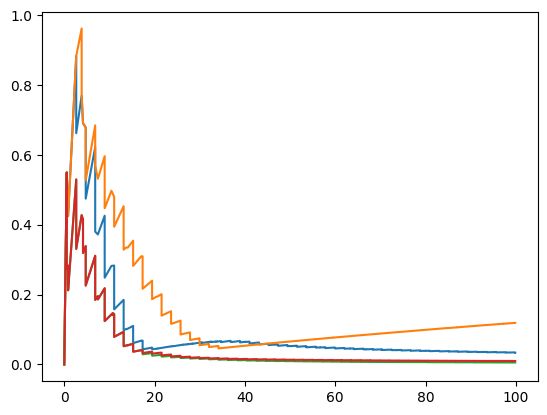

In [44]:
plt.plot(RenoEEdelay1.time_array, RenoEEdelay1.eedelay_array)
plt.plot(VegasEEdelay2.time_array, VegasEEdelay2.eedelay_array)
plt.plot(CubicEEdelay3.time_array, CubicEEdelay3.eedelay_array)
plt.plot(YeahEEdelay4.time_array, YeahEEdelay4.eedelay_array)


In [45]:
YeahEEdelay4.time_array

[0,
 0.55,
 0.550003,
 0.85,
 0.850003,
 2.650004,
 2.650006,
 2.650009,
 2.650011,
 3.85,
 4.150004,
 4.150006,
 4.150009,
 4.150011,
 4.750009,
 4.750011,
 4.750013,
 4.750015,
 4.750017,
 4.750019,
 4.750021,
 4.750023,
 6.850014,
 6.850016,
 6.850018,
 6.850021,
 6.850023,
 6.850025,
 6.850027,
 6.850029,
 6.850031,
 6.850033,
 6.850035,
 6.850037,
 6.850039,
 6.850041,
 6.850043,
 6.850046,
 7.450011,
 7.450014,
 7.450016,
 8.95002,
 8.950022,
 8.950024,
 8.950026,
 8.950028,
 8.95003,
 8.950032,
 8.950034,
 8.950036,
 8.950038,
 8.950041,
 8.950043,
 8.950045,
 8.950047,
 8.950049,
 8.950051,
 8.950053,
 8.950055,
 8.950057,
 8.950059,
 8.950061,
 8.950063,
 8.950065,
 8.950068,
 8.95007,
 8.950072,
 8.950074,
 8.950076,
 8.950078,
 8.95008,
 8.950082,
 8.950084,
 10.750016,
 10.750018,
 10.750021,
 10.750023,
 11.050025,
 11.050027,
 11.050029,
 11.050031,
 11.050033,
 11.050036,
 11.050038,
 11.05004,
 11.050042,
 11.050044,
 11.050046,
 11.050048,
 11.05005,
 11.050052,
 11.05

In [46]:
goodputDict04

{'reno': [-5,
  -5,
  -5,
  0,
  0,
  10,
  10,
  30,
  30,
  70,
  70,
  127,
  127,
  165,
  165,
  231,
  231,
  328,
  328,
  336,
  336,
  374,
  374,
  397,
  399,
  421,
  423,
  443,
  454,
  475,
  488,
  510,
  517,
  545,
  558,
  678,
  694,
  712,
  741,
  767,
  813,
  853,
  891,
  955,
  994,
  1057,
  1098,
  1162,
  1206,
  1272,
  1319,
  1387,
  1425,
  1446,
  1540,
  1551,
  1648,
  1684,
  1746,
  1800,
  1869,
  1922,
  1996,
  2049,
  2128,
  2184,
  2254,
  2312,
  2380,
  2437,
  2509,
  2564,
  2643,
  2695,
  2731,
  2855,
  2871,
  2994,
  3019,
  3095,
  3171,
  3249,
  3315,
  3395,
  3458,
  3540,
  3604,
  3688,
  3755,
  3837,
  3905,
  4008,
  4078,
  4160,
  4233,
  4237,
  4390,
  4395,
  4524,
  4558,
  4648],
 'cubic': [-5,
  -5,
  -5,
  5,
  5,
  25,
  25,
  65,
  65,
  125,
  125,
  157,
  157,
  320,
  322,
  499,
  499,
  609,
  653,
  889,
  931,
  931,
  1322,
  1322,
  1591,
  1591,
  1881,
  1881,
  2184,
  2187,
  2612,
  2621,
  3000,
 

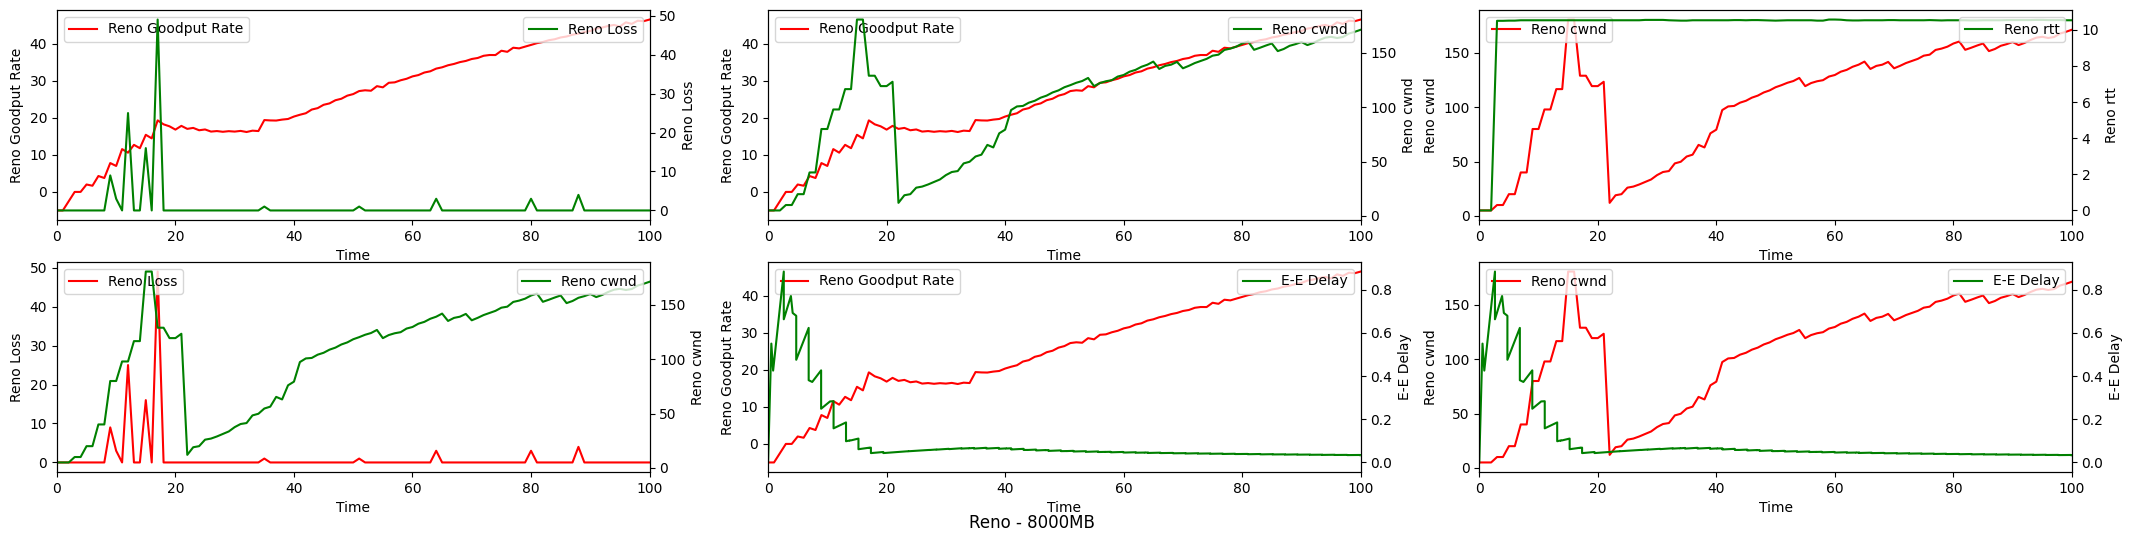

In [54]:
goodputRenoRate = derivative(goodputDict04['reno'])
lossReno = difference(lossDict04['reno'])
cwndReno = cwndDict04['reno']
rttReno = rttDict04['reno']
x = range(x_length)
# plt.figure(figsize=(18,5)) #adjust the size of plot
fig = plt.figure(figsize=(26,6))
ax1 = fig.add_subplot(231)
draw_doubleY(x, 'Time', goodputRenoRate, 'Reno Goodput Rate', lossReno, 'Reno Loss', ax1)
ax1 = fig.add_subplot(232)
draw_doubleY(x, 'Time', goodputRenoRate, 'Reno Goodput Rate', cwndReno, 'Reno cwnd', ax1)
ax1 = fig.add_subplot(233)
draw_doubleY(x, 'Time', cwndReno, 'Reno cwnd', rttReno, 'Reno rtt', ax1)
ax1 = fig.add_subplot(234)
draw_doubleY(x, 'Time', lossReno, 'Reno Loss', cwndReno, 'Reno cwnd', ax1)


ax1 = fig.add_subplot(235)
# CubicEEdelay3.time_array, CubicEEdelay3.eedelay_array
draw_doubleY(x, 'Time', goodputRenoRate, 'Reno Goodput Rate', RenoEEdelay1.eedelay_array, 'E-E Delay', ax1, x2=RenoEEdelay1.time_array)
ax1 = fig.add_subplot(236)
draw_doubleY(x, 'Time', cwndReno, 'Reno cwnd', RenoEEdelay1.eedelay_array, 'E-E Delay', ax1, x2=RenoEEdelay1.time_array)

fig.supxlabel('Reno - 8000MB')
plt.show()

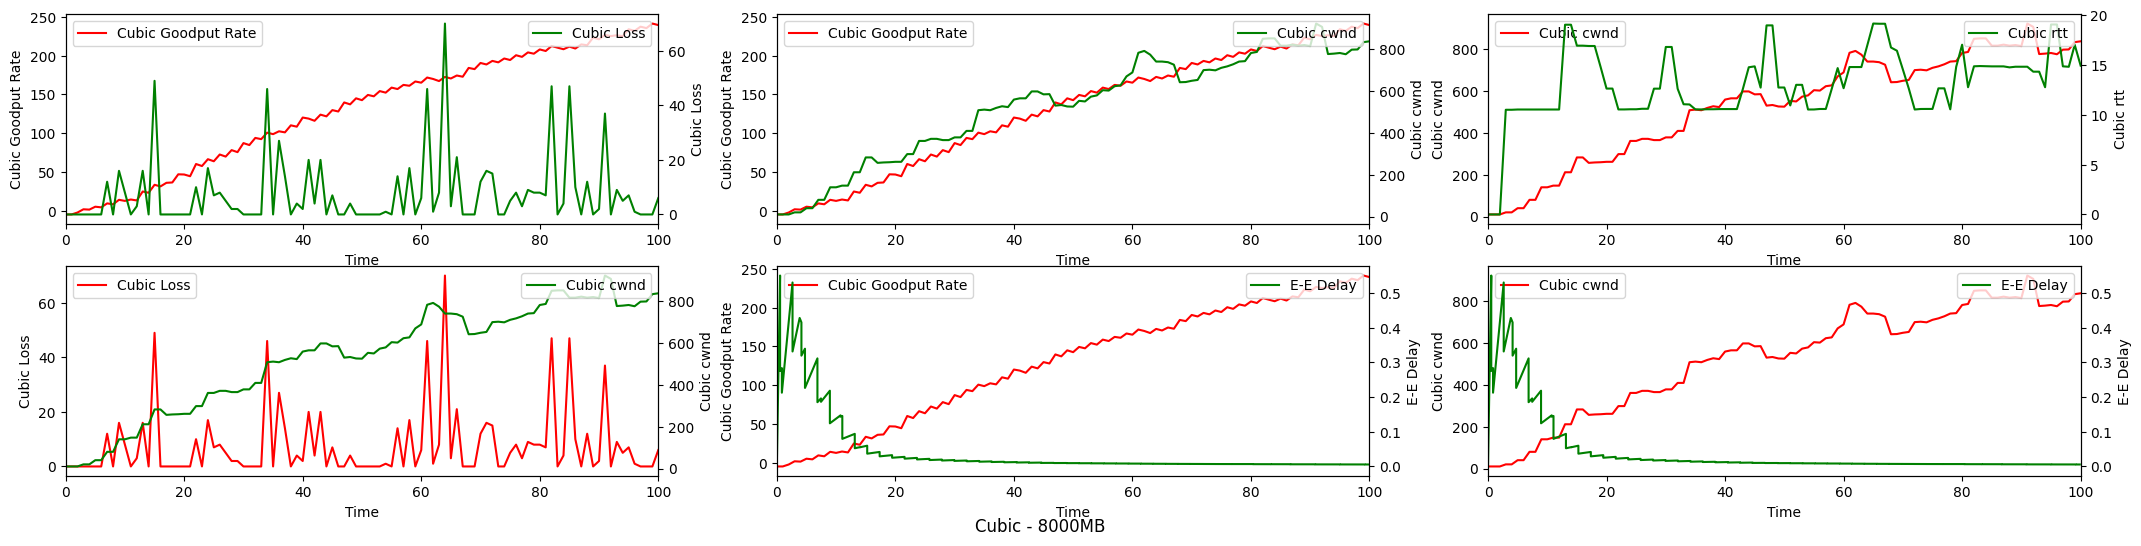

In [55]:
goodputCubicRate = derivative(goodputDict04['cubic'])
lossCubic = difference(lossDict04['cubic'])
cwndCubic = cwndDict04['cubic']
rttCubic = rttDict04['cubic']
x = range(x_length)
# plt.figure(figsize=(18,5)) #adjust the size of plot
fig = plt.figure(figsize=(26,6))
ax1 = fig.add_subplot(231)
draw_doubleY(x, 'Time', goodputCubicRate, 'Cubic Goodput Rate', lossCubic, 'Cubic Loss', ax1)
ax1 = fig.add_subplot(232)
draw_doubleY(x, 'Time', goodputCubicRate, 'Cubic Goodput Rate', cwndCubic, 'Cubic cwnd', ax1)
ax1 = fig.add_subplot(233)
draw_doubleY(x, 'Time', cwndCubic, 'Cubic cwnd', rttCubic, 'Cubic rtt', ax1)
ax1 = fig.add_subplot(234)
draw_doubleY(x, 'Time', lossCubic, 'Cubic Loss', cwndCubic, 'Cubic cwnd', ax1)

ax1 = fig.add_subplot(235)
# CubicEEdelay3.time_array, CubicEEdelay3.eedelay_array
draw_doubleY(x, 'Time', goodputCubicRate, 'Cubic Goodput Rate', CubicEEdelay3.eedelay_array, 'E-E Delay', ax1, x2=CubicEEdelay3.time_array)
ax1 = fig.add_subplot(236)
draw_doubleY(x, 'Time', cwndCubic, 'Cubic cwnd', CubicEEdelay3.eedelay_array, 'E-E Delay', ax1, x2=CubicEEdelay3.time_array)


fig.supxlabel('Cubic - 8000MB')

plt.show()

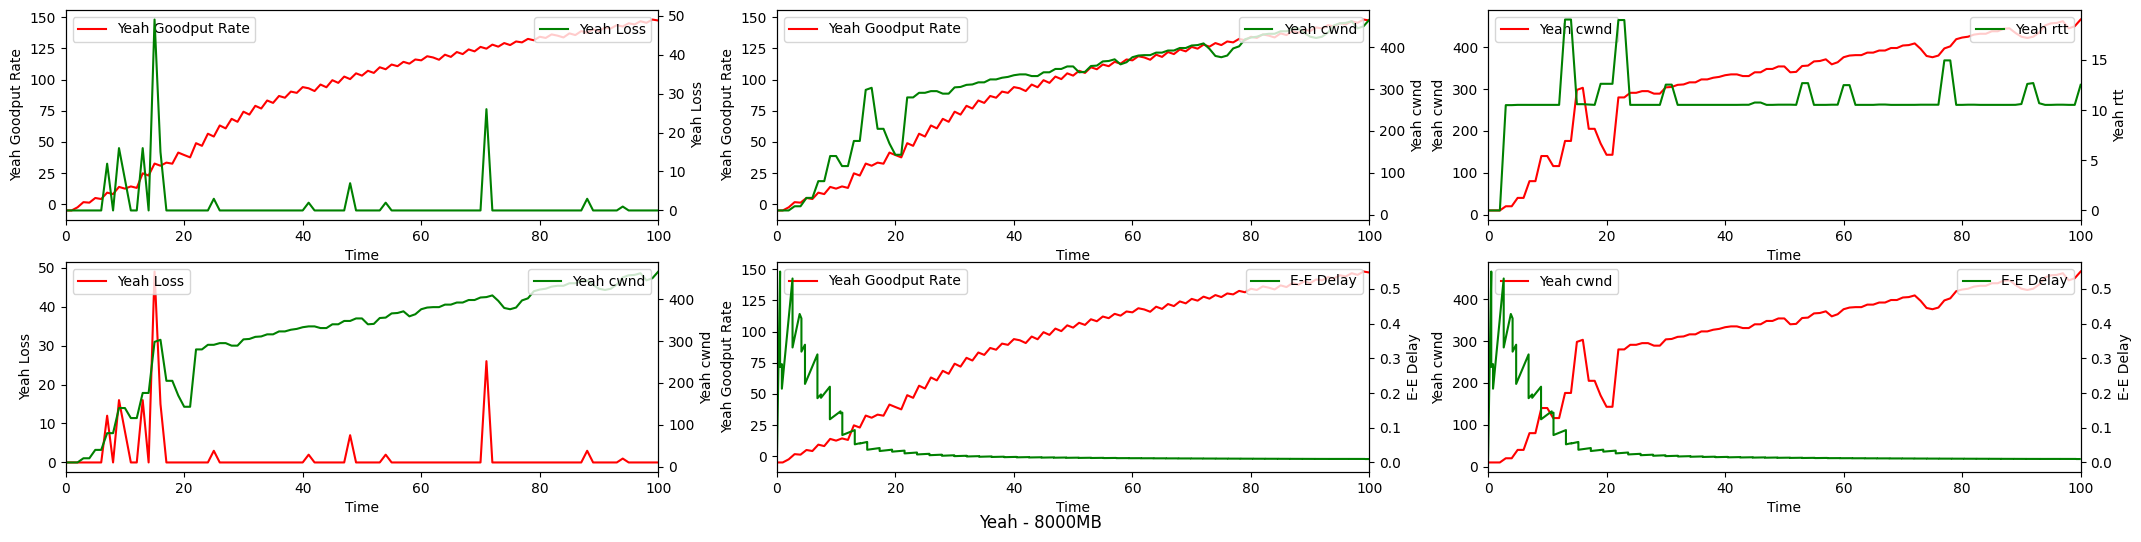

In [56]:
goodputYeahRate = derivative(goodputDict04['yeah'])
lossYeah = difference(lossDict04['yeah'])
cwndYeah = cwndDict04['yeah']
rttYeah = rttDict04['yeah']
x = range(x_length)
# plt.figure(figsize=(18,5)) #adjust the size of plot
fig = plt.figure(figsize=(26,6))
ax1 = fig.add_subplot(231)
draw_doubleY(x, 'Time', goodputYeahRate, 'Yeah Goodput Rate', lossYeah, 'Yeah Loss', ax1)
ax1 = fig.add_subplot(232)
draw_doubleY(x, 'Time', goodputYeahRate, 'Yeah Goodput Rate', cwndYeah, 'Yeah cwnd', ax1)
ax1 = fig.add_subplot(233)
draw_doubleY(x, 'Time', cwndYeah, 'Yeah cwnd', rttYeah, 'Yeah rtt', ax1)
ax1 = fig.add_subplot(234)
draw_doubleY(x, 'Time', lossYeah, 'Yeah Loss', cwndYeah, 'Yeah cwnd', ax1)


ax1 = fig.add_subplot(235)
# CubicEEdelay3.time_array, CubicEEdelay3.eedelay_array
draw_doubleY(x, 'Time', goodputYeahRate, 'Yeah Goodput Rate', YeahEEdelay4.eedelay_array, 'E-E Delay', ax1, x2=YeahEEdelay4.time_array)
ax1 = fig.add_subplot(236)
draw_doubleY(x, 'Time', cwndYeah, 'Yeah cwnd', YeahEEdelay4.eedelay_array, 'E-E Delay', ax1, x2=YeahEEdelay4.time_array)

fig.supxlabel('Yeah - 8000MB')


plt.show()

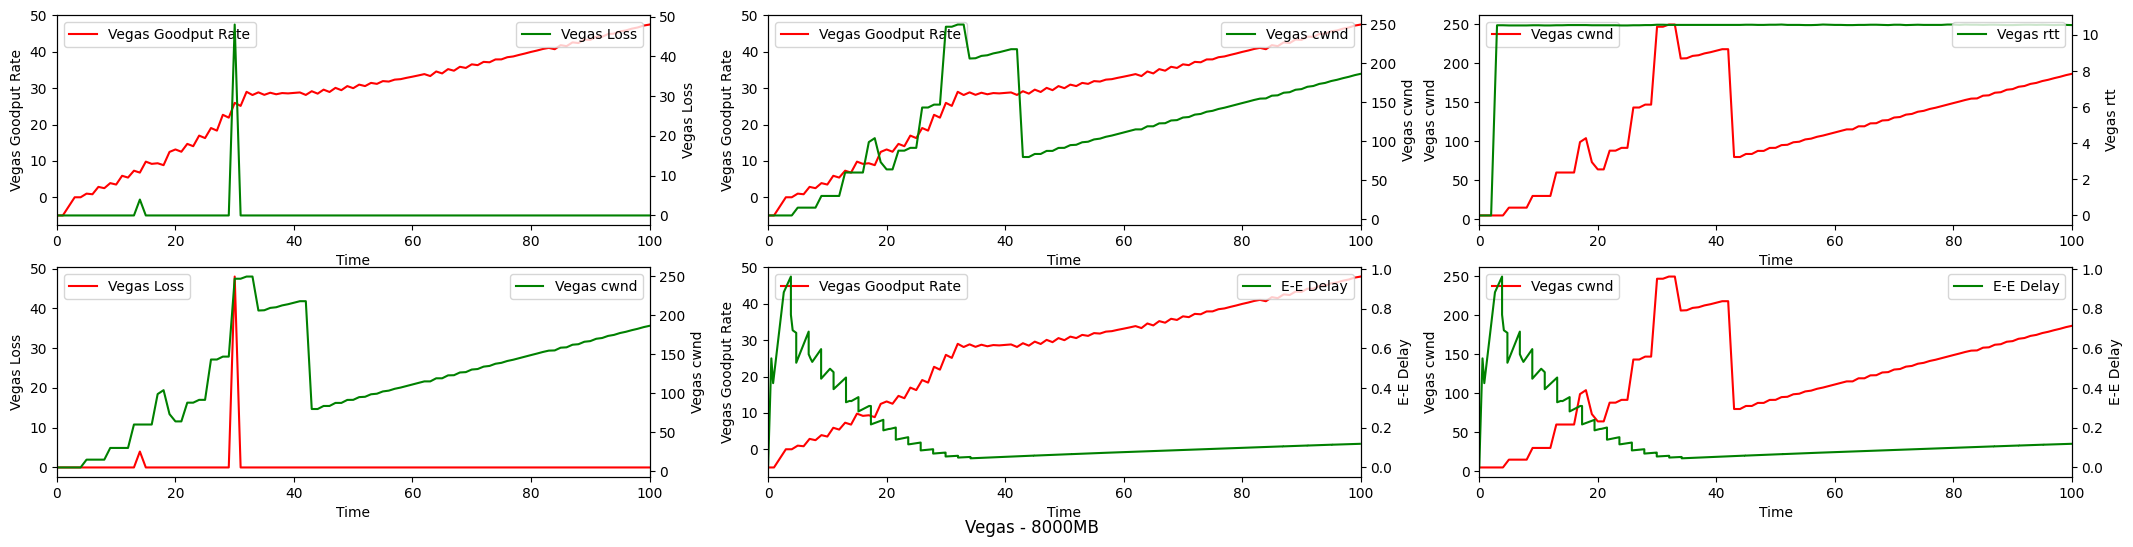

In [57]:
goodputVegasRate = derivative(goodputDict04['vegas'])
lossVegas = difference(lossDict04['vegas'])
cwndVegas = cwndDict04['vegas']
rttVegas = rttDict04['vegas']
x = range(x_length)
# plt.figure(figsize=(18,5)) #adjust the size of plot
fig = plt.figure(figsize=(26,6))
ax1 = fig.add_subplot(231)
draw_doubleY(x, 'Time', goodputVegasRate, 'Vegas Goodput Rate', lossVegas, 'Vegas Loss', ax1)
ax1 = fig.add_subplot(232)
draw_doubleY(x, 'Time', goodputVegasRate, 'Vegas Goodput Rate', cwndVegas, 'Vegas cwnd', ax1)
ax1 = fig.add_subplot(233)
draw_doubleY(x, 'Time', cwndVegas, 'Vegas cwnd', rttVegas, 'Vegas rtt', ax1)
ax1 = fig.add_subplot(234)
draw_doubleY(x, 'Time', lossVegas, 'Vegas Loss', cwndVegas, 'Vegas cwnd', ax1)


ax1 = fig.add_subplot(235)
# CubicEEdelay3.time_array, CubicEEdelay3.eedelay_array
draw_doubleY(x, 'Time', goodputVegasRate, 'Vegas Goodput Rate', VegasEEdelay2.eedelay_array, 'E-E Delay', ax1, x2=VegasEEdelay2.time_array)
ax1 = fig.add_subplot(236)
draw_doubleY(x, 'Time', cwndVegas, 'Vegas cwnd', VegasEEdelay2.eedelay_array, 'E-E Delay', ax1, x2=VegasEEdelay2.time_array)


fig.supxlabel('Vegas - 8000MB')


plt.show()

In [16]:
import csv
with open("data.csv", 'w') as file:
	csvFile = csv.writer(file)
	rowName = []
	rowName.append("Row")
	for key in cwndDict04.keys():
		rowName.append(key + "_cwnd")
		rowName.append(key + "_cwnd_derivative")
		rowName.append(key + "_cwnd_difference")
	for key in cwndDict04.keys():
		rowName.append(key + "_goodput")
		rowName.append(key + "_goodput_derivative")
		rowName.append(key + "_goodput_difference")
	for key in cwndDict04.keys():
		rowName.append(key + "_rtt")
		rowName.append(key + "_rtt_derivative")
		rowName.append(key + "_rtt_difference")
	for key in cwndDict04.keys():
		rowName.append(key + "_loss")
		rowName.append(key + "_loss_derivative")
		rowName.append(key + "_loss_difference")
	csvFile.writerow(rowName)
	for row in range(x_length):
		rowData = []
		rowData.append(row)
		for key in cwndDict04.keys():
			data = cwndDict04[key][row]
			rowData.append(data)
			data_derivative = derivative(cwndDict04[key])[row]
			data_difference = difference(cwndDict04[key])[row]
			rowData.append(data_derivative)
			rowData.append(data_difference)
		for key in goodputDict04.keys():
			data = goodputDict04[key][row]
			rowData.append(data)
			data_derivative = derivative(goodputDict04[key])[row]
			data_difference = difference(goodputDict04[key])[row]
			rowData.append(data_derivative)
			rowData.append(data_difference)
		for key in rttDict04.keys():
			data = rttDict04[key][row]
			rowData.append(data)
			data_derivative = derivative(rttDict04[key])[row]
			data_difference = difference(rttDict04[key])[row]
			rowData.append(data_derivative)
			rowData.append(data_difference)
		for key in lossDict04.keys():
			data = lossDict04[key][row]
			rowData.append(data)
			data_derivative = derivative(lossDict04[key])[row]
			data_difference = difference(lossDict04[key])[row]
			rowData.append(data_derivative)
			rowData.append(data_difference)
		csvFile.writerow(rowData)

In [17]:
derivative(goodputDict04['reno'])

[-1,
 -1.0,
 -0.5,
 0.0,
 0.0,
 0.4,
 0.3333333333333333,
 0.8571428571428571,
 0.75,
 1.5555555555555556,
 1.4,
 2.1818181818181817,
 2.0,
 2.0,
 1.8571428571428572,
 1.7333333333333334,
 1.625,
 1.5294117647058822,
 1.4444444444444444,
 1.4736842105263157,
 1.4,
 1.9047619047619047,
 1.8181818181818181,
 1.9130434782608696,
 1.8333333333333333,
 2.0,
 1.9230769230769231,
 2.111111111111111,
 2.0357142857142856,
 2.206896551724138,
 2.1333333333333333,
 2.2903225806451615,
 2.21875,
 2.393939393939394,
 2.323529411764706,
 2.5142857142857142,
 2.4444444444444446,
 2.3783783783783785,
 2.5789473684210527,
 2.5128205128205128,
 2.725,
 2.658536585365854,
 2.880952380952381,
 2.813953488372093,
 3.0454545454545454,
 2.977777777777778,
 3.217391304347826,
 3.148936170212766,
 3.3958333333333335,
 3.326530612244898,
 3.58,
 3.5098039215686274,
 3.769230769230769,
 3.69811320754717,
 3.9444444444444446,
 3.8727272727272726,
 4.125,
 4.052631578947368,
 3.9827586206896552,
 4.237288135593221